In [1]:
from src import api
from src.helpers import min_prices

In [2]:
lower = min_prices.from_vvo_mow_to_hkt()
lower

,city,price,depart_date
0,msc,33917.0,2023-07-19
1,msc,33917.0,2023-07-21
2,msc,33917.0,2023-07-23
3,msc,33917.0,2023-07-24
4,msc,33918.0,2023-07-29
5,vl,24558.0,2023-08-21
6,vl,24281.0,2023-08-22
7,vl,28003.0,2023-08-24
8,vl,24281.0,2023-08-25
9,msc,33917.0,2023-08-25


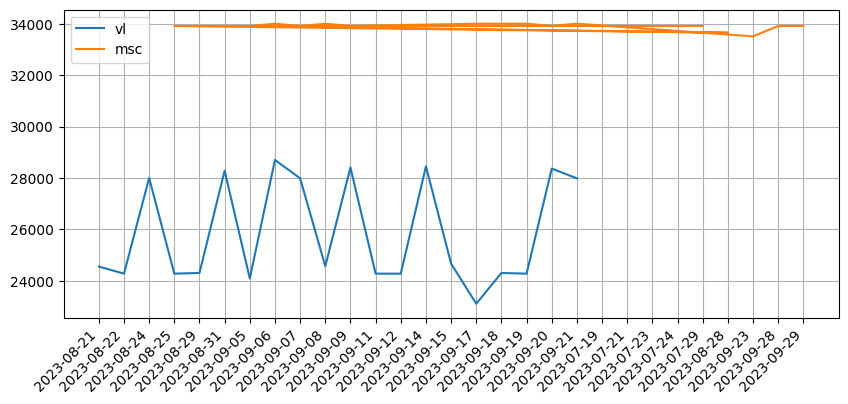

In [3]:
from matplotlib import pyplot as plt

lowerVL, lowerMSC = lower[lower['city'] == 'vl'], lower[lower['city'] == 'msc']
x1, y1 = lowerVL['depart_date'], lowerVL['price']
x2, y2 = lowerMSC['depart_date'], lowerMSC['price']

plt.figure(figsize=(10, 4))
plt.plot(x1, y1, label="vl")
plt.plot(x2, y2, label="msc")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)


In [4]:
from_original = 'MOW'
hot_ticket_offers = api.get_russian_hot_ticket_offers(from_=from_original)
hot_ticket_offers

[]

In [5]:
def code_to_places(code: str):
    import requests

    headers = {
        'authority': 'suggest.aviasales.ru',
        'accept': '*/*',
        'accept-language': 'en-RU,en;q=0.9,ru-RU;q=0.8,ru;q=0.7,en-GB;q=0.6,en-US;q=0.5',
        'content-type': 'application/json',
        'origin': 'https://www.aviasales.ru',
        'referer': 'https://www.aviasales.ru/',
        'sec-fetch-dest': 'empty',
        'sec-fetch-mode': 'cors',
        'sec-fetch-site': 'same-site',
        'user-agent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 13_2_3 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/13.0.3 Mobile/15E148 Safari/604.1',
    }

    params = {
        'locale': 'ru_RU',
        'term': code,
    }

    response = requests.get('https://suggest.aviasales.ru/v2/code_to_places.json', params=params, headers=headers)

    if response.status_code != 200:
        raise ValueError('Не удалось получить информацию по коду территории')
    
    return response.json()